Exploritary Data Analysis

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

In [35]:
df=pd.read_csv('C:/Users/USER/Downloads/coaster_db.csv')

Step1:Data Understanding
  [DataFrame Shape
  head and tail
  dtypes
  describe]

In [36]:
df.shape

(1087, 56)

In [49]:
df.head()

,coaster_name,Location,Status,Manufacturer,year_introduced,latitude,Type_Main,opening_date_clean,speed_mph
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,Wood,1884-06-16,6.0
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,Wood,1895-01-01,NaN
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,Other,NaT,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,Steel,1901-01-01,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,Steel,1901-01-01,NaN


In [52]:
df=df.rename(columns={
    'coaster_name':'Coaster_Name',
    'year_introduced':'Year_Introduced',
    'latitude':'Latitude',
    'opening_date_clean':'Opening_Date',
    'speed_mph':'Speed_MPH',
})

In [53]:
df.isna().sum()

Coaster_Name         0
Location             0
Status             213
Manufacturer        59
Year_Introduced      0
Latitude           275
Type_Main            0
Opening_Date       250
Speed_MPH          150
dtype: int64

In [60]:
df=df.loc[~df.duplicated(subset=['Coaster_Name','Location','Opening_Date'])].reset_index(drop=True).copy()

In [61]:
df.shape

(990, 9)

<Axes: title={'center': 'Top Year Coaster Introduced'}, xlabel='Year_Introduced'>

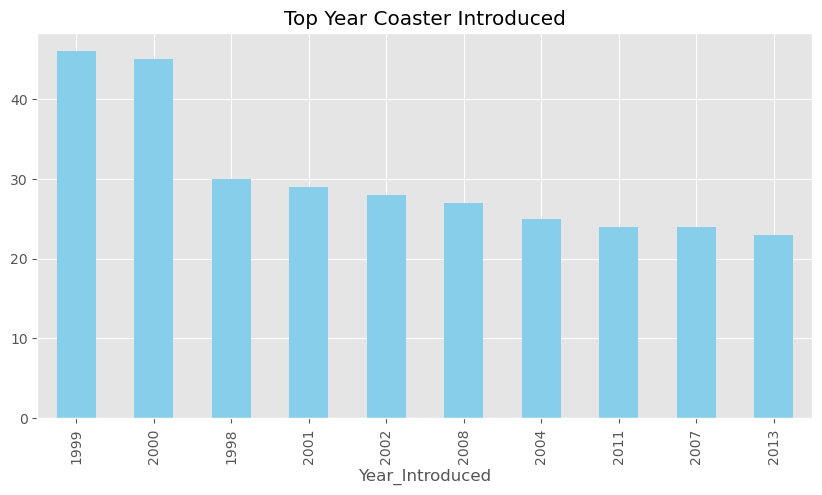

In [64]:
df['Year_Introduced'].value_counts().head(10).plot(kind='bar',figsize=(10,5),color='skyblue',title='Top Year Coaster Introduced')

Text(0.5, 0, 'Speed MPH')

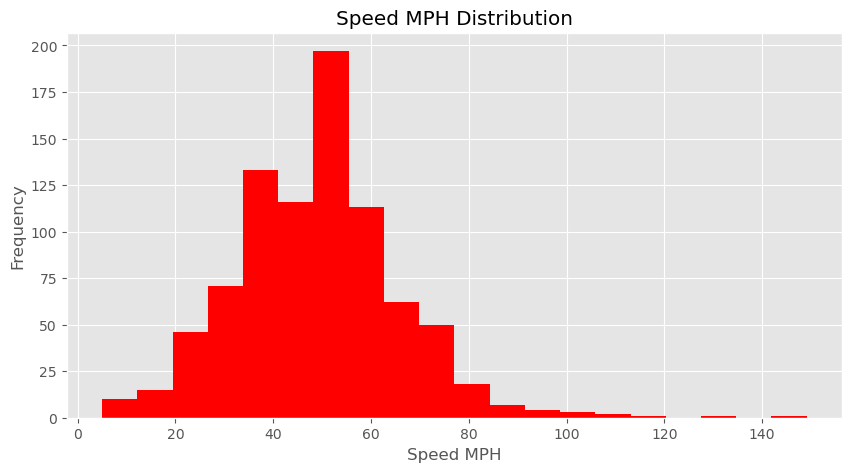

In [67]:
ax=df['Speed_MPH'].plot(kind='hist',bins=20,figsize=(10,5),color='red',title='Speed MPH Distribution')
ax.set_xlabel('Speed MPH')

Text(0.5, 0, 'Speed MPH')

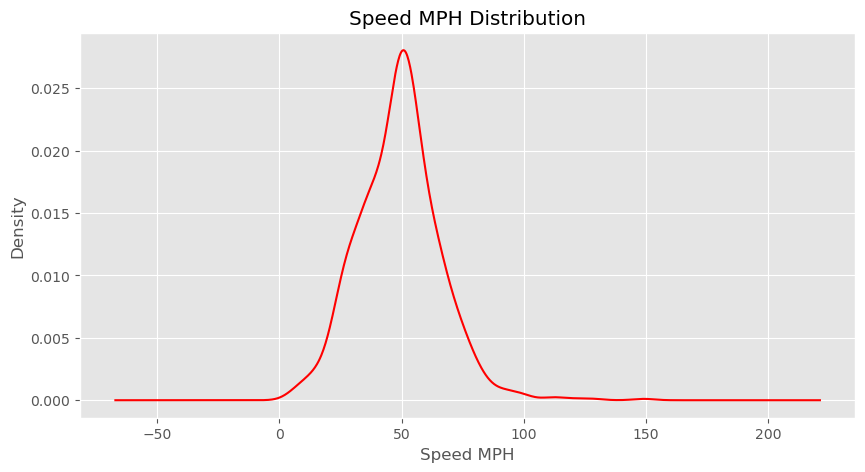

In [70]:
ax=df['Speed_MPH'].plot(kind='kde',figsize=(10,5),color='red',title='Speed MPH Distribution')
ax.set_xlabel('Speed MPH')

In [73]:
df.columns

Index(['Coaster_Name', 'Location', 'Status', 'Manufacturer', 'Year_Introduced',
       'Latitude', 'Type_Main', 'Opening_Date', 'Speed_MPH'],
      dtype='object')

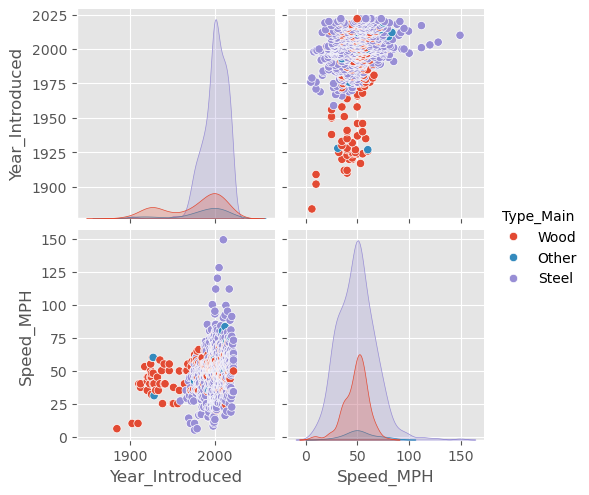

In [75]:
sns.pairplot(df,
             vars=['Year_Introduced','Speed_MPH'],hue='Type_Main')

plt.show()

In [76]:
df_corr=df[['Year_Introduced','Speed_MPH']].dropna().corr()

<Axes: >

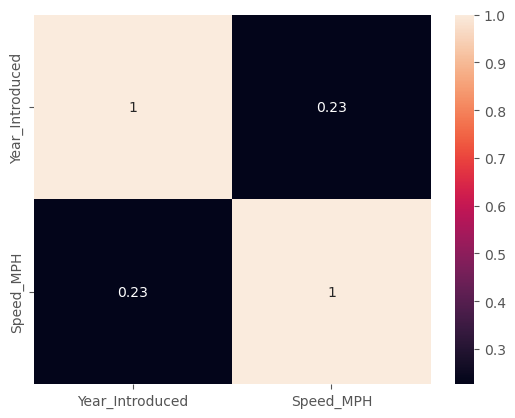

In [78]:
sns.heatmap(df_corr,annot=True)